<a href="https://colab.research.google.com/github/josware/data-science-intermediate/blob/main/YOLOR_Object_Detection_Images_%26_Video_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Run YOLOR on Google Colab - Images & Video : Base Template**

YoloR just got released, and it is better and faster than YoloV4, Scaled YoloV4, YoloV5 and PP-YOLOv2. In this YOLOR Object Detection Tutorial I am going to show you how to get YOLOR which stands for You Only Learn One Representation, working on Collab, on Images and Video. All right here and right now. No time to waste guys, lets get started!!

Visit the original repo [https://github.com/WongKinYiu/yolor](https://github.com/WongKinYiu/yolor). 

# **Want to Become a YOLOR Expert?**
💻Get Started with YOLOR [Get Started](https://augmentedstartups.info/YOLOR-Get-Started). <br>
⭐ Download the Code at the [AI Vision Store](https://augmentedstartups.info/VisionStore)<br>
☕ Buy me [Chai/Coffee](https://bit.ly/BuymeaCoffeeAS)

# **Tutorial**

We will be implementing the following steps:

1.   Setting up Dependencies
2.   Run on Image
3.   Run on Video


# **About Me**

[Augmented Startups](https://www.augmentedstartups.com) provides tutorials in AI Computer Vision and Augmented Reality. With over **88K subscribers** on our channel, we teach state-of-art models and build apps and projects that solve real-world problems. 


![picture](https://drive.google.com/uc?export=view&id=1V5A3UZaHLmLuUsbqkF39bR8JvyiI0oud)

# **Tutorial**

Watch the Tutorial [HERE](https://youtube.com/playlist?list=PL_Nji0JOuXg3T0qOj-quorbrcqrnkahqm) 

# **Setting up Dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/augmentedstartups/yolor
%cd yolor

Cloning into 'yolor'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 375 (delta 104), reused 50 (delta 46), pack-reused 210
Receiving objects: 100% (375/375), 2.97 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolor


In [ ]:
%ls

cfg/      detect.py   LICENSE    requirements.txt  train.py  Yolor-cpu.yml
darknet/  figure/     models/    scripts/          tune.py   Yolor-gpu.yml
data/     inference/  README.md  test.py           utils/


In [ ]:
# pip install required packages
!pip install -qr requirements.txt


     |████████████████████████████████| 645kB 7.4MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.7MB 15.9MB/s 
     |████████████████████████████████| 1.5MB 8.4MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.


In [ ]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
%ls

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 3.73 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/yolor/mish-cuda
csrc/  Dockerfile  extra/  LICENSE  README.md  setup.py  src/  test/


In [ ]:
!python setup.py build install


/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cuda.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
adding license file 'LICENSE'
writing manifest file 'src/mish

In [ ]:
# Install PyTorch Wavelets


In [ ]:
%cd ..
%pwd

/content/yolor


'/content/yolor'

In [ ]:
!git clone https://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install .

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 972 (delta 75), reused 89 (delta 45), pack-reused 836
Receiving objects: 100% (972/972), 6.80 MiB | 20.36 MiB/s, done.
Resolving deltas: 100% (659/659), done.
/content/yolor/pytorch_wavelets
Processing /content/yolor/pytorch_wavelets
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-cp37-none-any.whl size=54872 sha256=f60dbb90cee2f0d9e5f93c3a576d5bc6bccf48fd2433f511e01e791e79b9b2bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-2hxbinzp/wheels/03/e5/53/d1d1a638580a340e426e477d69e8c0b5b5b675209dbdd5e6cb
Successfully built pytorch-wavelets


In [ ]:
%cd ..

/content/yolor


In [ ]:
!bash scripts/get_pretrain.sh


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3044      0 --:--:-- --:--:-- --:--:--  3044
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142M    0  142M    0     0  94.7M      0 --:--:--  0:00:01 --:--:--  248M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3264      0 --:--:-- --:--:-- --:--:--  3264
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  305M    0  305M    0     0   105M      0 --:--:--  0:00:02 --:--:--  123M




---



# **Runing on Image**

In [ ]:
yolor_img_inputDir = "/content/drive/MyDrive/yolor/imgIn/"
yolor_img_outputDir = "/content/drive/MyDrive/yolor/imgOut/"

In [ ]:
%ls

cfg/       figure/     models/            scripts/  utils/         yolor_w6.pt
darknet/   inference/  pytorch_wavelets/  test.py   Yolor-cpu.yml
data/      LICENSE     README.md          train.py  Yolor-gpu.yml
detect.py  mish-cuda/  requirements.txt   tune.py   yolor_p6.pt


In [ ]:
!python detect.py --source /content/drive/MyDrive/yolor/imgIn/cancun.jpg --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/yolor/imgOut/


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='/content/drive/MyDrive/yolor/imgOut/', save_txt=False, source='/content/drive/MyDrive/yolor/imgIn/cancun.jpg', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/1 /content/drive/MyDrive/yolor/imgIn/cancun.jpg: 960x1280 25 persons, 2 handbags, 1 ties, 6 bottles, 2 wine glasss, 1 cups, 1 sandwichs, 1 pizzas, 1 cakes, 11 chairs, 2 potted plants, 3 dining tables, Done. (0.058s)
Results saved to /content/drive/MyDrive/yolor/imgOut
Done. (1.191s)


In [ ]:
#display inference on ALL test images
#this looks much better with longer training above


In [ ]:
import glob
from IPython.display import Image, display


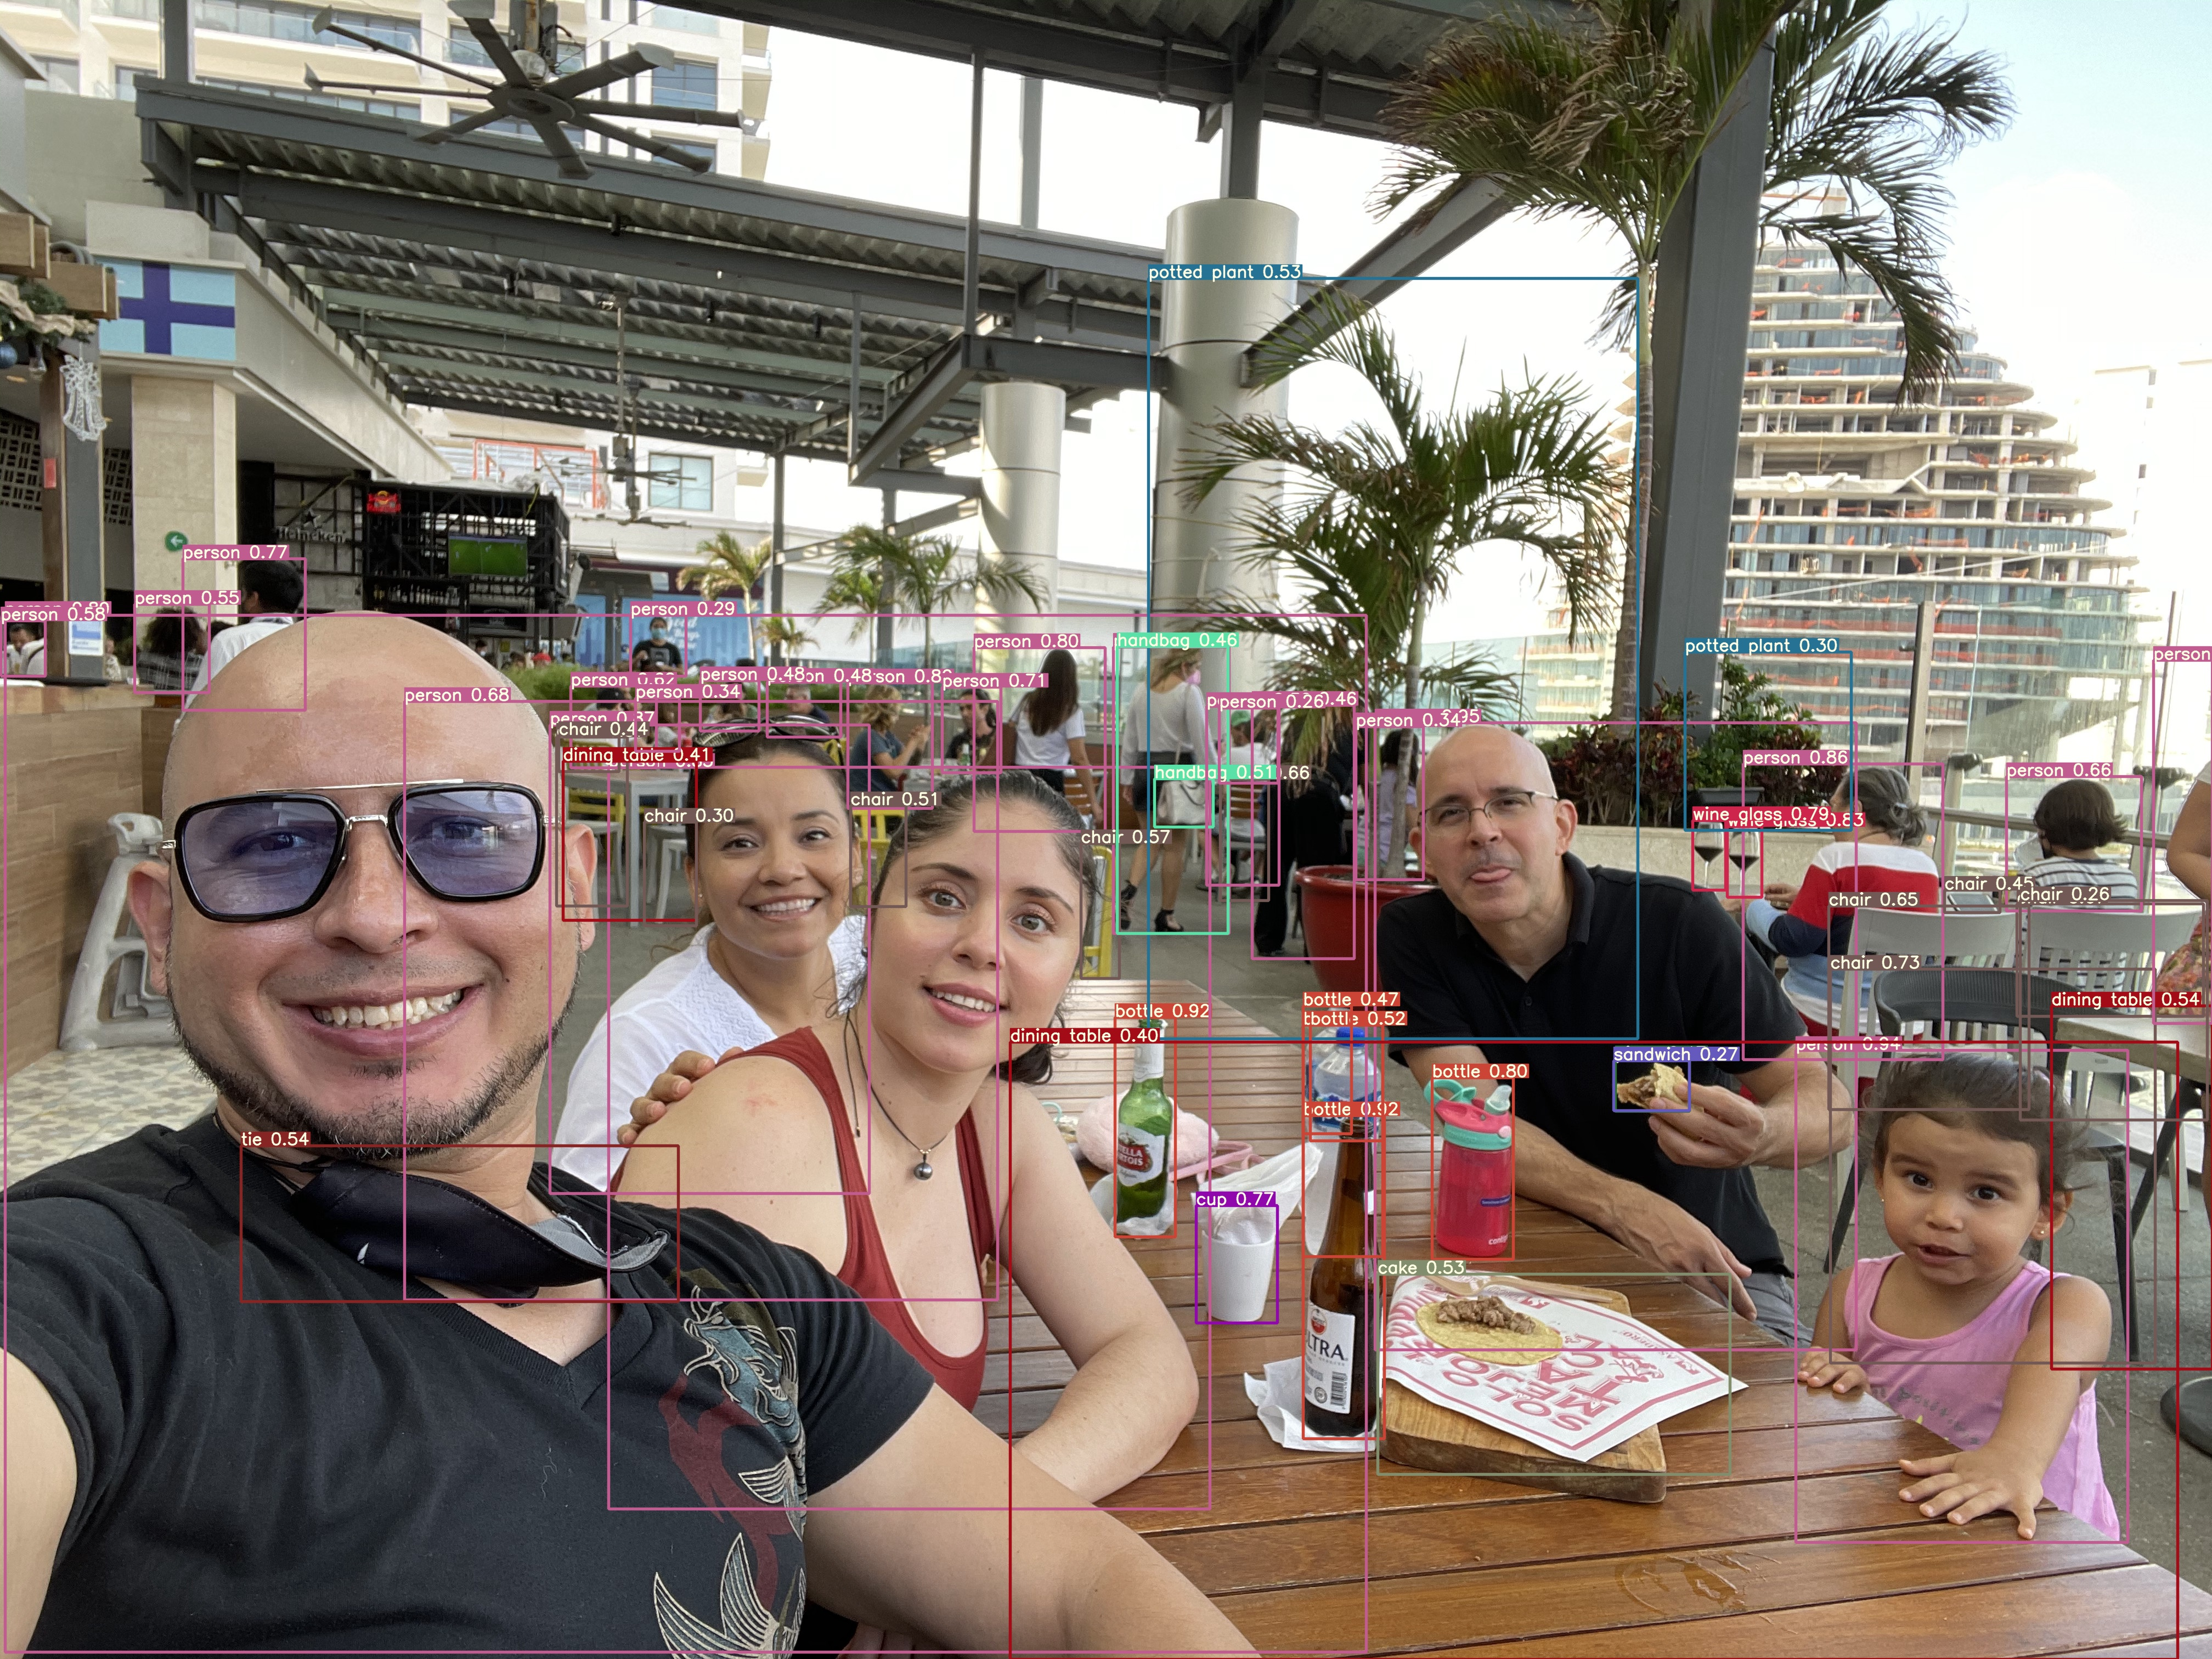

In [ ]:
for imageName in glob.glob(yolor_img_outputDir + "*.jpg"):
  display(Image(filename=imageName))
  print("\n")



---



# **Running on Video**

## **Upload Video**

**[USER INPUT] You can either upload a video using the files upload dialog or upload it to google drive**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

#not Using it, I want it to be in Drive, not sure how to make it from colab so direct upload

**[USER INPUT] Insert File Name into Source**

**OR**

## **Get Video From Drive**

**[USER INPUT] Upload video from Google Drive**

You will need to specify your input and output folders on GDrive.

In [ ]:
!python detect.py --source /content/drive/MyDrive/yolor/videoIn/IMG_8190.MOV --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/yolor/videoOut/


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='/content/drive/MyDrive/yolor/videoOut/', save_txt=False, source='/content/drive/MyDrive/yolor/videoIn/IMG_8190.MOV', update=False, view_img=False, weights=['yolor_p6.pt'])
video 1/1 (1/714) /content/drive/MyDrive/yolor/videoIn/IMG_8190.MOV: 768x1280 10 persons, 1 backpacks, 3 handbags, 1 bottles, 2 cups, 2 bowls, 7 bananas, 3 chairs, 1 dining tables, Done. (0.052s)
video 1/1 (2/714) /content/drive/MyDrive/yolor/videoIn/IMG_8190.MOV: 768x1280 10 persons, 1 backpacks, 1 handbags, 1 bottles, 2 cups, 2 bowls, 7 bananas, 1 sandwichs, 4 chairs, 1 dining tables, Done. (0.052s)
video 1/1 (3/714) /content/drive/MyDrive/yolor/videoIn/IMG_8190.MOV: 768x1280 9 persons, 1 backpacks, 2 handbags, 2 cups, 2 bowls, 7 bananas, 2 chairs, 1 dining tables, Done. (0.046s)
video 1/1 (4/714) /content/drive/MyDrive/yolor/videoIn/IMG_8190.

## **Display Output**

We need to compress the video in order to display large videos. Otherwise you can download it straight from you Google Drive Folder

In [ ]:
from IPython.display import HTML
from base64 import  b64encode
import os

save_path = "/content/drive/MyDrive/yolor/videoOut/IMG_8190.MOV"
compressed_path = "/content/drive/MyDrive/yolor/videoOut/IMG_8190_compressed.MOV"

In [ ]:
os.system(f"ffmpeg -i {save_path} -vcodec libx164 {compressed_path}")

256

In [ ]:
mp4 = open(save_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
<source src="%s" type = "video/mp4">
,/video>)
""" %data_url)

# **Conclusion**

If you enjoyed this tutorial and want more on **YOLOR** then:

💻Get Started with YOLOR [Get Started](https://augmentedstartups.info/YOLOR-Get-Started). <br>
⭐ Download the Code at the [AI Vision Store](https://augmentedstartups.info/VisionStore)<br>
☕ Show your support with [Chai/Coffee](https://bit.ly/BuymeaCoffeeAS)

![picture](https://drive.google.com/uc?export=view&id=1V5A3UZaHLmLuUsbqkF39bR8JvyiI0oud)